In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#  import dataset
data_dbd = pd.read_excel('/content/data_dbd_jateng.xlsx')

In [5]:
# filtering the dataset that we needed, ignore the unnecessarry column
data_dbd_filter = data_dbd.iloc[6:41,[2,3,5,7,9,11,13,15,17,19,21,23,25]]

In [6]:
# rename the column	#E9967A
final_data_dbd = data_dbd_filter.rename(columns={'Unnamed: 2':'Kabupaten/Kodya',
                                              'Unnamed: 3':'Jan',
                                              'Unnamed: 5':'Feb',
                                              'Unnamed: 7':'Mar',
                                              'Unnamed: 9':'Apr',
                                              'Unnamed: 11':'May',
                                              'Unnamed: 13':'Jun',
                                              'Unnamed: 15':'Jul',
                                              'Unnamed: 17':'Aug',
                                              'Unnamed: 19':'Sep',
                                              'Unnamed: 21':'Okt',
                                              'Unnamed: 23':'Nov',
                                              'Unnamed: 25':'Des'})

In [7]:
#reset index
final_data_dbd.reset_index(drop=True, inplace=True)

In [8]:
final_data_dbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Kabupaten/Kodya  35 non-null     object
 1   Jan              35 non-null     object
 2   Feb              35 non-null     object
 3   Mar              35 non-null     object
 4   Apr              35 non-null     object
 5   May              35 non-null     object
 6   Jun              35 non-null     object
 7   Jul              35 non-null     object
 8   Aug              35 non-null     object
 9   Sep              35 non-null     object
 10  Okt              35 non-null     object
 11  Nov              35 non-null     object
 12  Des              35 non-null     object
dtypes: object(13)
memory usage: 3.7+ KB


In [9]:
# declareate x as the value of our dataset

X = final_data_dbd.loc[:,['Jan','Feb','Mar',
                    'Apr','May','Jun',
                    'Jul','Aug','Sep',
                    'Okt','Nov','Des']].values

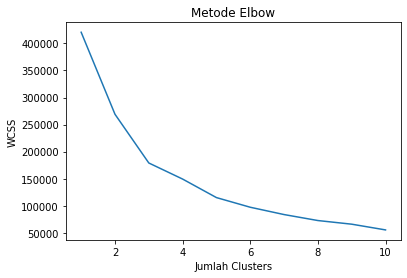

In [10]:
# Use elbow method to detemine the number of cluster

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# find the centroid for each month and each cluster
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [12]:
# show the cluster
print(kmeans.labels_)

# Add column "Claster" into dataset
final_data_dbd['Cluster']=kmeans.labels_
final_data_dbd

[0 0 3 3 3 3 2 3 1 0 3 2 3 0 1 4 4 1 0 1 0 0 3 3 0 3 3 3 0 2 3 2 3 2 2]


,Kabupaten/Kodya,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Okt,Nov,Des,Cluster
0,CILACAP,62,76,70,101,67,92,78,48,12,16,16,16,0
1,BANYUMAS,32,157,29,134,68,21,9,8,4,16,11,15,0
2,PURBALINGGA,56,36,52,4,10,32,25,4,8,0,11,13,3
3,BANJARNEGARA,53,85,37,47,48,13,21,4,2,3,4,13,3
4,KEBUMEN,49,44,50,39,82,50,11,0,3,16,9,13,3
5,PURWOREJO,47,29,32,29,28,22,12,0,3,3,0,12,3
6,WONOSOBO,7,5,10,9,12,12,2,4,3,0,0,0,2
7,MAGELANG,40,55,51,52,15,4,13,2,1,16,13,7,3
8,BOYOLALI,95,121,28,74,34,11,26,7,7,14,15,4,1
9,KLATEN,40,65,107,126,66,26,51,28,2,16,15,10,0


In [13]:
# rename the clustername
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(0,'first cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(1,'second cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(2,'third cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(3,'fourth cluster')
final_data_dbd['Cluster']=final_data_dbd['Cluster'].replace(4,'fiveth cluster')

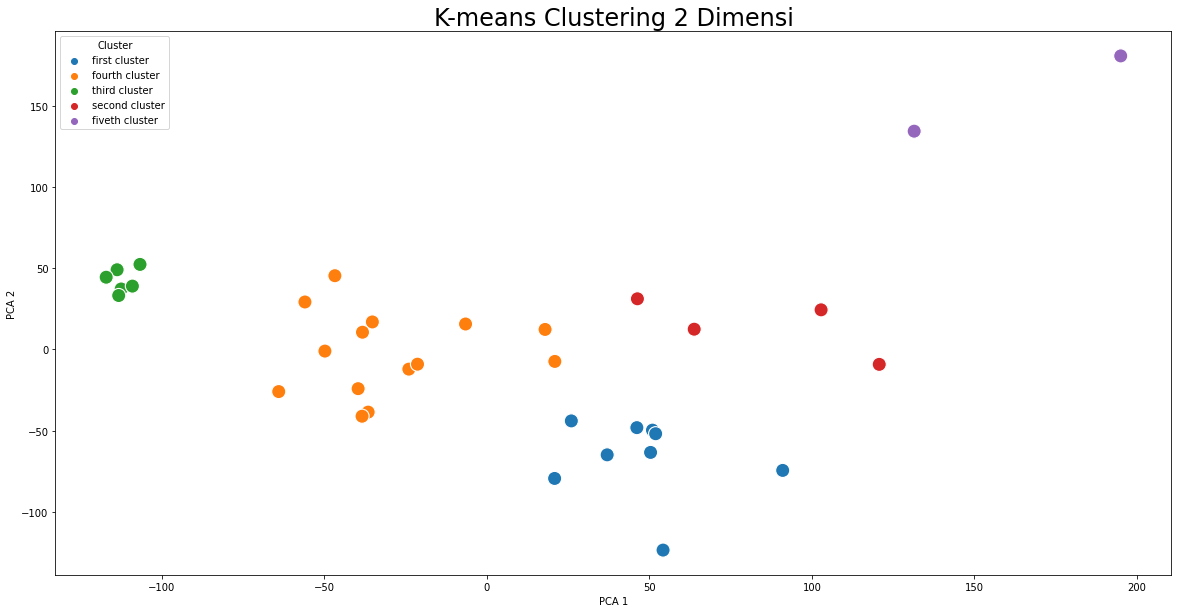

In [14]:
import seaborn as sns
from sklearn.decomposition import PCA


reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['PCA 1','PCA 2'])

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue=final_data_dbd['Cluster'], data=results,s=200)
plt.title('K-means Clustering 2 Dimensi', fontsize=24)
plt.show()